In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load train and test datasets
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")


In [ ]:
print("Training data shape:", train_data.shape)
print("\nFirst few rows of training data:")
print(train_data.head())

Training data shape: (1460, 81)

First few rows of training data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  

In [ ]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
print("\nMissing values in selected features:")
print(train_data[features].isnull().sum())



Missing values in selected features:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
dtype: int64


In [ ]:
# Create the TotalBath feature for training data
train_data['TotalBath'] = train_data['FullBath'] + 0.5 * train_data['HalfBath']

# Create the TotalBath feature for test data
test_data['TotalBath'] = test_data['FullBath'] + 0.5 * test_data['HalfBath']


In [ ]:
X_train = train_data[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
y_train = train_data['SalePrice']

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"GrLivArea (Square Footage): {model.coef_[0]:.2f}")
print(f"BedroomAbvGr (Bedrooms): {model.coef_[1]:.2f}")
print(f"TotalBath (Bathrooms): {model.coef_[2]:.2f}")


Model Coefficients:
Intercept: 52305.36
GrLivArea (Square Footage): 107.04
BedroomAbvGr (Bedrooms): -27861.46
TotalBath (Bathrooms): 26337.60


In [ ]:
y_train_pred = model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print("\nModel Performance on Training Data:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance on Training Data:
Mean Squared Error: 2650808108.05
Root Mean Squared Error: 51486.00
R² Score: 0.5797


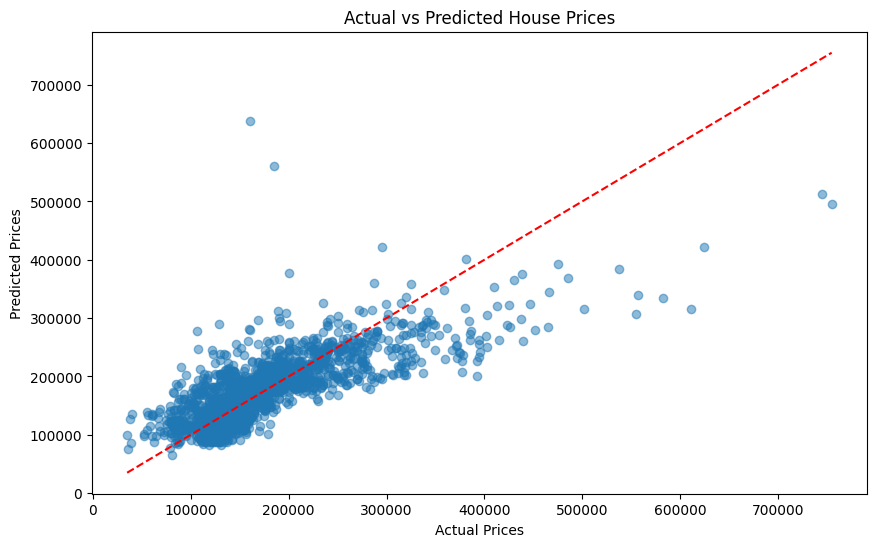

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

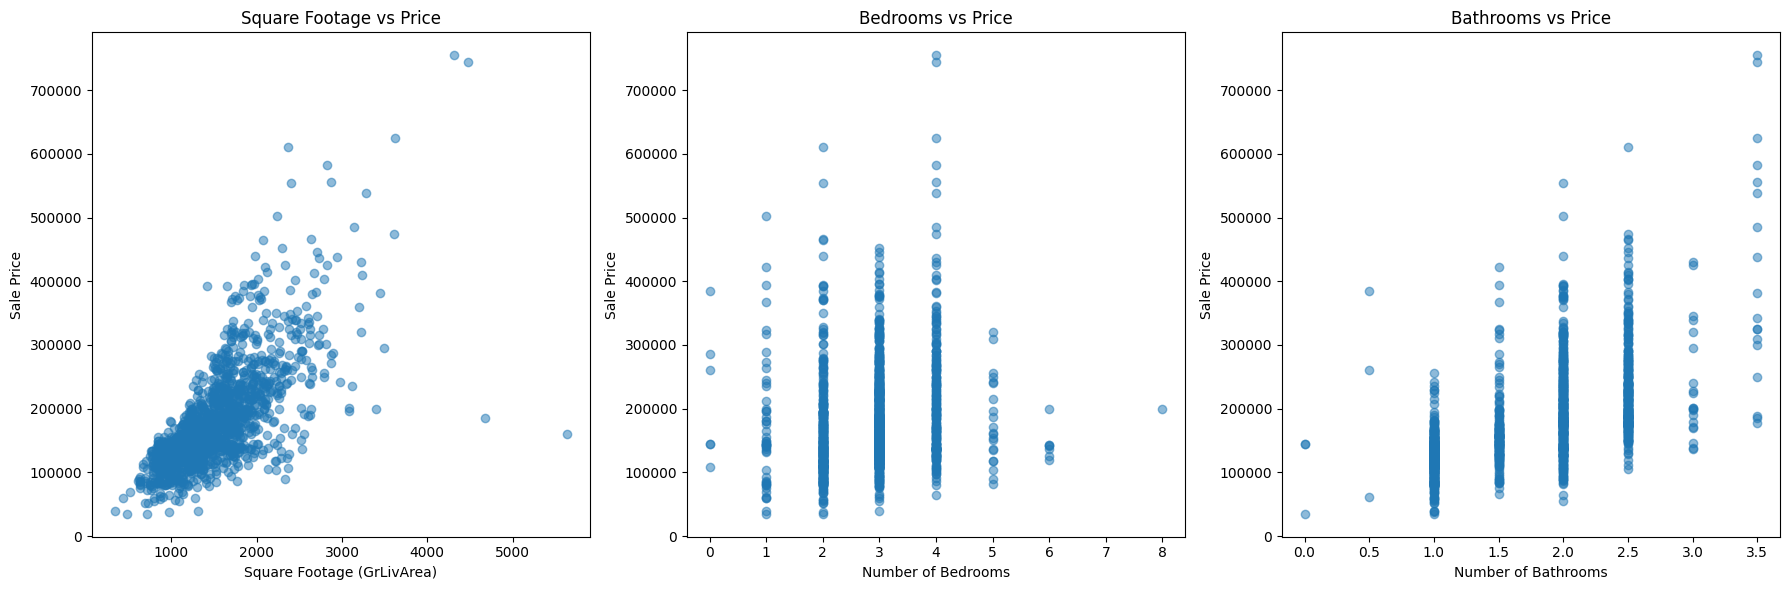

In [ ]:
# Create visualizations for each feature's relationship with price
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Square Footage vs Price
axes[0].scatter(X_train['GrLivArea'], y_train, alpha=0.5)
axes[0].set_xlabel('Square Footage (GrLivArea)')
axes[0].set_ylabel('Sale Price')
axes[0].set_title('Square Footage vs Price')

# Bedrooms vs Price
axes[1].scatter(X_train['BedroomAbvGr'], y_train, alpha=0.5)
axes[1].set_xlabel('Number of Bedrooms')
axes[1].set_ylabel('Sale Price')
axes[1].set_title('Bedrooms vs Price')

# Bathrooms vs Price
axes[2].scatter(X_train['TotalBath'], y_train, alpha=0.5)
axes[2].set_xlabel('Number of Bathrooms')
axes[2].set_ylabel('Sale Price')
axes[2].set_title('Bathrooms vs Price')

plt.tight_layout()
plt.show()


In [ ]:
# Make predictions on test data
if 'SalePrice' not in test_data.columns:
    X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
    test_predictions = model.predict(X_test)

    # Create a submission DataFrame
    submission = pd.DataFrame({
        'Id': test_data['Id'],
        'SalePrice': test_predictions
    })

    # Save the predictions
    submission.to_csv('house_price_predictions.csv', index=False)
    print("\nPredictions saved to 'house_price_predictions.csv'")
else:
    # If test data has SalePrice, evaluate on test data too
    X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
    y_test = test_data['SalePrice']
    y_test_pred = model.predict(X_test)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    print("\nModel Performance on Test Data:")
    print(f"Mean Squared Error: {test_mse:.2f}")
    print(f"Root Mean Squared Error: {test_rmse:.2f}")
    print(f"R² Score: {test_r2:.4f}")



Predictions saved to 'house_price_predictions.csv'


In [ ]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
})

feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
        Feature   Coefficient  Abs_Coefficient
1  BedroomAbvGr -27861.458423     27861.458423
2     TotalBath  26337.602152     26337.602152
0     GrLivArea    107.041039       107.041039


In [ ]:

def predict_my_house(square_footage, bedrooms, bathrooms):
    price = predict_house_price(square_footage, bedrooms, bathrooms, model)
    print(f"\nPredicted price for a house with:")
    print(f"- {square_footage} square feet")
    print(f"- {bedrooms} bedrooms")
    print(f"- {bathrooms} bathrooms")
    print(f"\nPredicted Price: ${price:,.2f}")
    return price


predict_my_house(2200, 3, 2.5)


Predicted price for a house with:
- 2200 square feet
- 3 bedrooms
- 2.5 bathrooms

Predicted Price: $270,055.28


np.float64(270055.27725506225)